In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def parser(filename, image):
    abs, ord, width = [], [], []

    with open(filename, encoding='windows-1251') as f:
        content = f.read()
        content = content.replace(',', '.')
        content = list(content.split('\n'))

    strokes, n_lines, levels, stroke_types = [], [], [], []
    _, _, stroke_type, _, _, _, n_str, _, level = content[0].split()
    for i, el in enumerate(content[1:-1]):
        if el[0].isdigit():
            x, y, w = map(float, el.split())
            abs.append(round(x))
            ord.append(round(image.shape[0] - y))
            width.append(w)
        else:
            strokes.append((abs, ord, width))
            n_lines.append(n_str)
            levels.append(level)
            stroke_types.append(stroke_type)
            _, _, stroke_type, _, _, _, n_str, _, level = el.split()
            abs, ord, width = [], [], []

    strokes.append((abs, ord, width))
    n_lines.append(int(n_str))
    levels.append(level)
    stroke_types.append(stroke_type)

    return strokes, {'stroke_types': stroke_types,'n_string': n_lines, 'levels': levels}

In [4]:
def freq_out(strokes, stroke_info):
    n_strings = int(stroke_info['n_string'][-1]) + 1
    lst_n_out = [0] * n_strings 
    lst_n_all = [0] * n_strings
    for i, stroke in enumerate(strokes):
        if stroke_info['levels'][i] == 'выступающий':
            lst_n_out[int(stroke_info['n_string'][i])] += 1
        lst_n_all[int(stroke_info['n_string'][i])] += 1
    return np.array(lst_n_out) / np.array(lst_n_all)

In [414]:
image = cv2.imread('почерки и штрихи/Почерк 4_2.jpg')
handwriting = 'почерки и штрихи/Почерк 4_2.txt'
strokes_test, stroke_info_test = parser(handwriting, image)

np.nan_to_num(freq_out(strokes_test, stroke_info_test))

array([0.04878049, 0.25925926])

In [5]:
def freqo(strokes, stroke_info): # функция для подсчёта частоты штрихов о в строке
    n_strings = int(stroke_info['n_string'][-1]) + 1
    lst_n_0 = [0] * n_strings 
    lst_n_all = [0] * n_strings
    for i, stroke in enumerate(strokes):
        if stroke_info['stroke_types'][i] == 'Ring':
            lst_n_0[int(stroke_info['n_string'][i])] += 1
        lst_n_all[int(stroke_info['n_string'][i])] += 1
    return np.array(lst_n_0) / np.array(lst_n_all)

In [6]:
def formo(strokes, stroke_info): # функция для подсчёта "формы" штрихов о
    oshapes = []
    for i, stroke in enumerate(strokes):
        if stroke_info['stroke_types'][i] == 'Ring' and stroke_info['levels'][i] == 'базовый':
            x = np.array(stroke[0]).mean()
            y = np.array(stroke[1]).mean()
            mx, mn = 0, 100000
            for j in range(len(stroke[0])):
                if (stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2 > mx:
                    mx = (stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2
                if (stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2 < mn:
                    mn = (stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2
            oshapes.append(mx/mn)
    oshapes = np.array(oshapes)
    o = oshapes
    l = len(oshapes)
    oshapes = sorted(oshapes)
    oshapes = np.array(oshapes[:round(0.85*l)])
    oshapes = np.delete(oshapes, np.where(oshapes > 10))

    return l, len(oshapes), o, oshapes, oshapes.mean()

In [7]:
def formo_test(strokes, stroke_info):
    oshapes = []
    for i, stroke in enumerate(strokes):
        if stroke_info['stroke_types'][i] == 'Ring' and stroke_info['levels'][i] == 'базовый':
            x = np.array(stroke[0]).mean()
            y = np.array(stroke[1]).mean()
            mx, mn = 0, 100000
            for j in range(len(stroke[0])):
                if (stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2 > mx:
                    mx = (stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2
                if (stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2 < mn:
                    mn = (stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2
            oshapes.append(mx/mn)
    oshapes = np.array(oshapes)
    o = oshapes
    l = len(oshapes)
    oshapes = sorted(oshapes)
    oshapes = np.array(oshapes[:round(0.85*l)])
    oshapes = np.delete(oshapes, np.where(oshapes > 10))

    return l, len(oshapes), o, oshapes, oshapes.mean()

form  (12, 10, array([ 7.08409615,  4.23607427,  6.27810651, 13.28892063,  5.79448121,
        3.77598293,  7.52268867,  4.9749059 ,  7.38052866,  8.9558011 ,
        7.38052866,  8.9558011 ]), array([3.77598293, 4.23607427, 4.9749059 , 5.79448121, 6.27810651,
       7.08409615, 7.38052866, 7.38052866, 7.52268867, 8.9558011 ]), 6.33831940572456)
mean area  (16, array([232.13265743,  97.5034962 ,  66.51324136, 328.17452944,
       173.22940357, 167.77043679, 123.63552894, 138.70312872,
        77.5631296 ,  72.56100675, 163.05264248,  47.26779661,
        72.56100675, 163.05264248,  87.95209976,  47.26779661]), array([ 47.26779661,  47.26779661,  66.51324136,  72.56100675,
        72.56100675,  77.5631296 ,  87.95209976,  97.5034962 ,
       123.63552894, 138.70312872, 163.05264248, 163.05264248,
       167.77043679, 173.22940357]), 107.04523975930782)


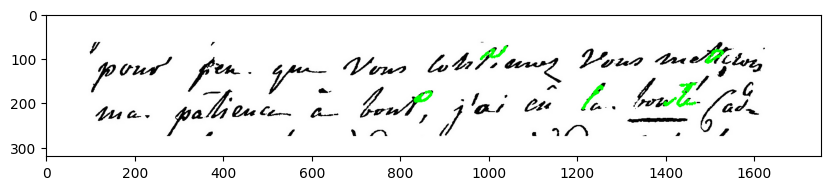

In [413]:
image = cv2.imread('почерки и штрихи/Почерк 4_2.jpg')
handwriting = 'почерки и штрихи/Почерк 4_2.txt'
strokes_test, stroke_info_test = parser(handwriting, image)

for i, stroke in enumerate(strokes_test):
    if stroke_info_test['levels'][i] == 'выступающий':
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

print('form ', formo_test(strokes_test, stroke_info_test))
print('mean area ', areao(strokes_test, stroke_info_test))

In [8]:
def areao(strokes, stroke_info):
    # contours = []
    # for stroke in strokes:
    #     cnt = []
    #     for point in zip(stroke[0], stroke[1]):
    #         cnt.append([[point[0], point[1]]])
    #     cnt.append(cnt[0])
    #     contours.append(np.array(cnt))
    # squares = []
    # for cnt in contours:
    #     squares.append(cv2.contourArea(cnt))
    oarea = []
    for i, stroke in enumerate(strokes):
        if stroke_info['stroke_types'][i] == 'Ring':
            x = np.array(stroke[0]).mean()
            y = np.array(stroke[1]).mean()
            mx, mn = 0, 100000
            for j in range(len(stroke[0])):
                if ((stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2) ** 0.5 > mx:
                    mx = ((stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2) ** 0.5
                if ((stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2) ** 0.5 < mn:
                    mn = ((stroke[0][j] - x) ** 2 + (stroke[1][j] - y) ** 2) ** 0.5
            oarea.append(mx * mn * 3.1415)
    oarea = np.array(oarea)
    l = len(oarea)
    o = oarea
    oarea = sorted(oarea)
    oarea = np.array(oarea[:round(0.85*l)])
    # oarea = np.delete(oarea, np.where(oarea > 10))

    return l, o, oarea, oarea.mean()

## Первый почерк

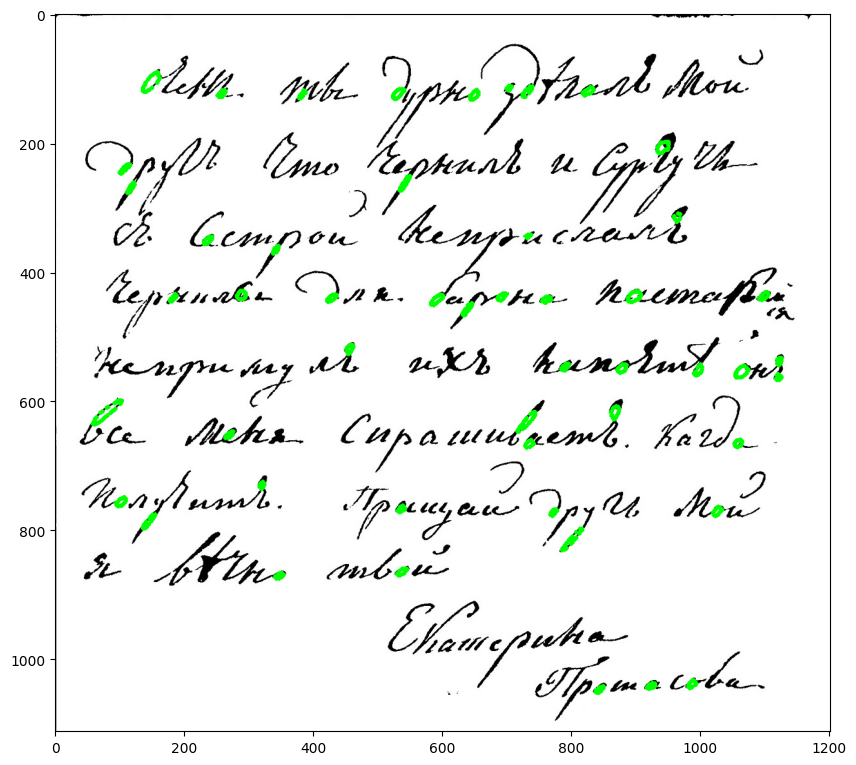

In [285]:
image = cv2.imread('почерки и штрихи/Почерк 1.jpg')
handwriting = 'почерки и штрихи/Почерк 1.txt'
strokes1, stroke_info1 = parser(handwriting, image)
for i, stroke in enumerate(strokes1):
    if stroke_info1["stroke_types"][i] == 'Ring':
        # print('len ', len(stroke[0]), '  str ', stroke_info_old['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [ ]:
f = freqo(strokes1, stroke_info1)
print('Частота по строкам: ', f)
print('Средняя частота: ', np.nanmean(f))

In [264]:
formo(strokes1, stroke_info1)

(40,
 35,
 array([ 9.88262512,  4.13594821, 23.33962264,  6.53247689,  8.06188119,
         6.41995842, 13.08524138, 11.38888889, 19.02115541,  8.89783454,
         6.53846154, 11.96986301,  2.58258427,  8.75793799,  7.23420866,
         6.38842975,  4.50087213,  6.45789101,  5.78440367,  3.39060832,
         5.13531936,  3.01587103,  6.3229572 ,  8.94175888,  2.81671924,
         2.77078385,  3.66305587,  3.14249493,  7.88514129,  4.03514151,
         4.875625  ,  6.12182388,  9.48579824,  7.14820983,  3.0966644 ,
         4.875625  ,  6.12182388,  9.48579824,  7.14820983,  3.0966644 ]),
 array([9.88262512, 4.13594821, 6.53247689, 8.06188119, 6.41995842,
        8.89783454, 6.53846154, 2.58258427, 8.75793799, 7.23420866,
        6.38842975, 4.50087213, 6.45789101, 5.78440367, 3.39060832,
        5.13531936, 3.01587103, 6.3229572 , 8.94175888, 2.81671924,
        2.77078385, 3.66305587, 3.14249493, 7.88514129, 4.03514151,
        4.875625  , 6.12182388, 9.48579824, 7.14820983, 3.096664

In [266]:
areao(strokes1, stroke_info1)
np.mean(areao(strokes1, stroke_info1))

105.36312913692997

## Второй почерк

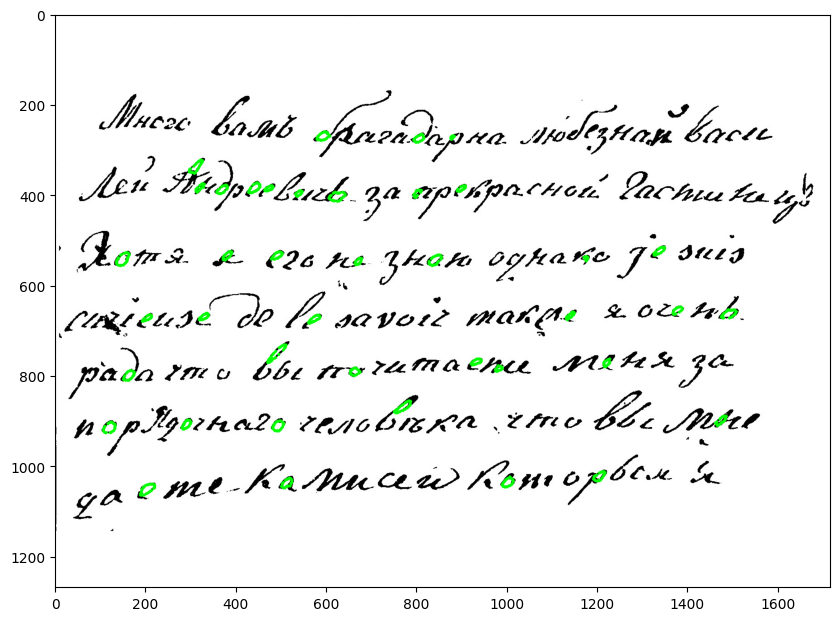

In [190]:
image = cv2.imread('почерки и штрихи/Почерк 2.jpg')
handwriting = 'почерки и штрихи/Почерк 2.txt'
strokes2, stroke_info2 = parser(handwriting, image)

for i, stroke in enumerate(strokes2):
    if stroke_info2["stroke_types"][i] == 'Ring':
        # print('len ', len(stroke[0]), '  str ', stroke_info_old['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [167]:
f = freqo(strokes2, stroke_info2)
print('Частота по строкам: ', f)
print('Средняя частота: ', np.nanmean(f))

Частота по строкам:  [0.06521739 0.15789474 0.12280702 0.13043478 0.13043478 0.11111111
 0.12698413]
Средняя частота:  0.12069770700042029


In [191]:
formo(strokes2, stroke_info2)

(40,
 34,
 array([ 3.77351485,  5.30401126, 12.00371747, 26.69357798,  4.80821992,
         5.58488929, 10.19821475,  8.43892243,  6.24091848,  9.61288404,
        13.41570439,  3.70580121,  8.24710569,  8.19077353,  5.24927684,
         4.85194967,  8.42355009,  9.1100885 ,  8.41441624,  8.514377  ,
        13.45274508, 13.36792453,  5.31318601,  6.28743559,  2.97525877,
         7.05163205,  4.92307692,  6.051341  ,  2.40706316,  6.17006038,
         2.7277905 , 12.11612284,  6.0366705 ,  5.21923434,  3.59611898,
         6.11406578,  6.0366705 ,  5.21923434,  3.59611898,  6.11406578]),
 array([ 3.77351485,  5.30401126,  4.80821992,  5.58488929, 10.19821475,
         8.43892243,  6.24091848,  9.61288404,  3.70580121,  8.24710569,
         8.19077353,  5.24927684,  4.85194967,  8.42355009,  9.1100885 ,
         8.41441624,  8.514377  ,  5.31318601,  6.28743559,  2.97525877,
         7.05163205,  4.92307692,  6.051341  ,  2.40706316,  6.17006038,
         2.7277905 ,  6.0366705 ,  5.21

In [234]:
# areao(strokes2, stroke_info2)
np.mean(areao(strokes2, stroke_info2))

260.52798197162514

## Третий почерк

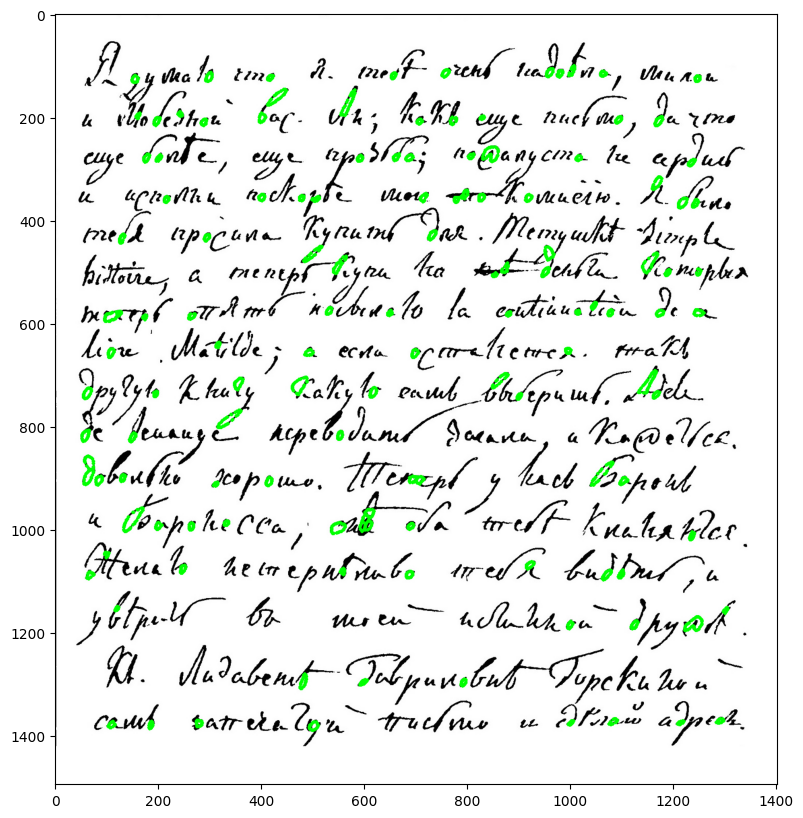

In [232]:
image = cv2.imread('почерки и штрихи/Почерк 3.jpg')
handwriting = 'почерки и штрихи/Почерк 3.txt'
strokes3, stroke_info3 = parser(handwriting, image)

for i, stroke in enumerate(strokes3):
    if stroke_info3["stroke_types"][i] == 'Ring':
        # print('len ', len(stroke[0]), '  str ', stroke_info_old['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [ ]:
f = freqo(strokes3, stroke_info3)
print('Частота по строкам: ', f)
print('Средняя частота: ', np.nanmean(f))

In [206]:
formo(strokes3, stroke_info3)

(114,
 103,
 array([  1.80236525,   4.57411601,   3.83325505,   3.11433447,
          3.0625    ,   5.0394875 ,   6.87697161,  13.61511111,
          3.09954751,   2.51994092,   5.07643312,   3.27630058,
          3.16618911,   3.6545218 ,   2.25573946,   3.64452353,
          3.49560633,   4.66908563,   9.5423276 ,   5.92544   ,
         11.53230769,   2.88307692,   5.46839784,   3.33177285,
          4.42459943, 218.6       ,   2.92      ,   7.70394072,
          3.24336283,   2.14820593,   2.46579417,  14.11298482,
          5.73675871,   2.48265395,   4.03144105,   3.475892  ,
          2.69226277,   2.46463654,   8.38365272,   4.41911765,
          5.55772888,   8.61934477,   5.57241379,  13.24840045,
         27.77433064,   6.02906574,   4.11341393,   6.59290035,
          2.24590164,   4.11862069,   6.90229578,   3.42397336,
          5.28397566,   1.63891578,   2.71616198,   4.15680473,
          4.21534247,   3.88023873,   5.07588076,   4.39739494,
          3.66231648,   5.01

In [235]:
# areao(strokes3, stroke_info3)
np.mean(areao(strokes3, stroke_info3))

129.5742229714063

## Четвёртый почерк

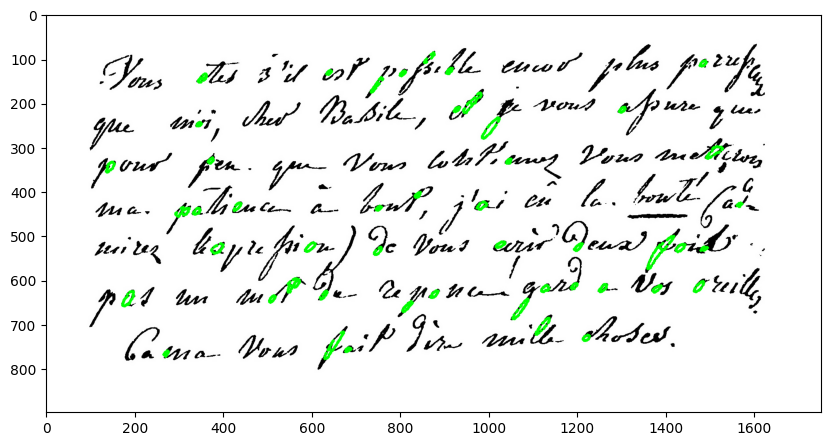

In [233]:
image = cv2.imread('почерки и штрихи/Почерк 4.jpg')
handwriting = 'почерки и штрихи/Почерк 4.txt'
strokes4, stroke_info4 = parser(handwriting, image)

for i, stroke in enumerate(strokes4):
    # if int(stroke_info4['n_string'][i]) == 6:
    if stroke_info4["stroke_types"][i] == 'Ring':
        # print('len ', len(stroke[0]), '  str ', stroke_info_old['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [ ]:
f = freqo(strokes4, stroke_info4)
print('Частота по строкам: ', f)
print('Средняя частота: ', np.nanmean(f))

In [194]:
formo(strokes4, stroke_info4)

(50,
 45,
 array([21.39483021,  5.73402356,  5.37260274,  9.15548864, 10.51848512,
         9.19317746,  5.29705882,  7.06049978,  7.19713881,  8.1919815 ,
         3.02338462,  7.16133682,  4.23607427,  6.27810651, 13.28892063,
         5.92411125,  4.05498699,  7.52268867,  4.9749059 ,  7.38052866,
         8.9558011 ,  6.05016781,  8.71606597,  7.84607938,  8.05219305,
        12.8125    , 42.20524017, 20.1888163 ,  6.22875058,  8.82424677,
        12.30505497,  6.19590574,  5.73547268,  9.39672216,  9.60831296,
         8.57394889,  8.87320261, 11.59936909, 14.4222361 , 10.19714088,
        10.49484845,  5.46137339, 15.89883001, 48.31962865,  7.4       ,
         3.90673575, 15.89883001, 48.31962865,  7.4       ,  3.90673575]),
 array([ 5.73402356,  5.37260274,  9.15548864, 10.51848512,  9.19317746,
         5.29705882,  7.06049978,  7.19713881,  8.1919815 ,  3.02338462,
         7.16133682,  4.23607427,  6.27810651, 13.28892063,  5.92411125,
         4.05498699,  7.52268867,  4.97

In [236]:
# areao(strokes4, stroke_info4)
np.mean(areao(strokes4, stroke_info4))

173.39622971212415

## Teстовое изображение

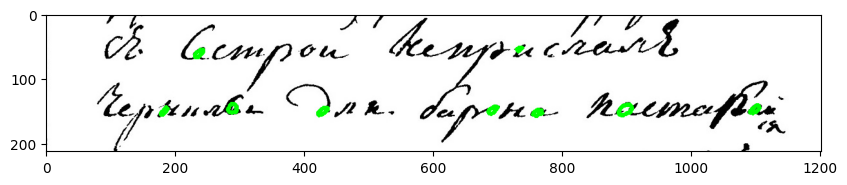

In [200]:
image = cv2.imread('почерки и штрихи/Почерк 1_2.jpg')
handwriting = 'почерки и штрихи/Почерк 1_2.txt'
strokes_test, stroke_info_test = parser(handwriting, image)

for i, stroke in enumerate(strokes_test):
    # if int(stroke_info4['n_string'][i]) == 6:
    if stroke_info_test["stroke_types"][i] == 'Ring' and stroke_info_test['levels'][i] == 'базовый':
        # print('len ', len(stroke[0]), '  str ', stroke_info_old['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [201]:
formo_test(strokes_test, stroke_info_test)

(10,
 array([8.17525773, 6.53846154, 9.56097561, 2.49015009, 8.75793799,
        8.20731707, 6.38842975, 4.50087213, 6.45789101, 6.45789101]),
 6.753518394559902)

(11,
 array([ 3.77351485,  4.76933231, 12.00371747, 26.69357798,  4.80821992,
         5.41072894, 10.19821475,  8.43892243,  6.61023435,  9.61288404,
        13.41570439]),
 9.612277403596197)

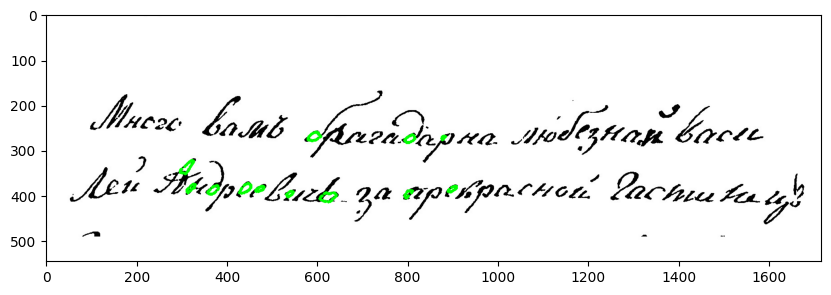

In [239]:
image = cv2.imread('почерки и штрихи/Почерк 2_1.jpg')
handwriting = 'почерки и штрихи/Почерк 2_1.txt'
strokes_test, stroke_info_test = parser(handwriting, image)

for i, stroke in enumerate(strokes_test):
    # if int(stroke_info4['n_string'][i]) == 6:
    if stroke_info_test["stroke_types"][i] == 'Ring':
        # print('len ', len(stroke[0]), '  str ', stroke_info_old['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
formo_test(strokes_test, stroke_info_test)

In [242]:
areao(strokes_test, stroke_info_test)
np.mean(areao(strokes_test, stroke_info_test))

215.3611935641686

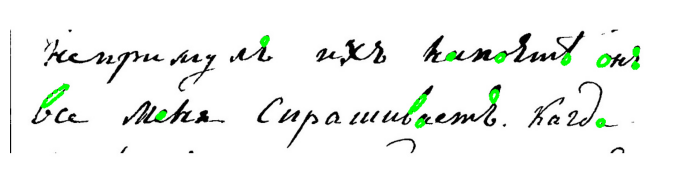

In [46]:
image = cv2.imread('почерки и штрихи/Почерк 1_3.jpg')
handwriting = 'почерки и штрихи/Почерк 1_3.txt'
strokes_test, stroke_info_test = parser(handwriting, image)

for i, stroke in enumerate(strokes_test):
    # if int(stroke_info4['n_string'][i]) == 6:
    if stroke_info_test["stroke_types"][i] == 'Ring':
        # print('len ', len(stroke[0]), '  str ', stroke_info_old['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(7, 2))
plt.axis('off')
# fig.suptitle('Распределение штрихов по кривизне для строк', fontsize=30, y=1)
fig.tight_layout()
plt.imshow(image, cmap='gray')
formo_test(strokes_test, stroke_info_test)
fig.savefig("err.pdf")

# Построение классификатора

In [30]:
image = cv2.imread('почерки и штрихи/Почерк 1_3.jpg')
handwriting = 'почерки и штрихи/Почерк 1_3.txt'
strokes_test, stroke_info_test = parser(handwriting, image)

form = formo_test(strokes_test, stroke_info_test)
a = areao(strokes_test, stroke_info_test)
freq = np.nan_to_num(freq_out(strokes_test, stroke_info_test)).mean()

author = 0
if a[3] > 160:
    author = 2
elif freq < 0.115 and a[3] < 92:
    author = 1
elif freq > 0.115 and form[-1] < 5.7:
    author = 3
elif a[3] > 92 and form[-1] > 5.7:
    author = 4
else:
    author = -1
print(f'This is {author} author')

This is 3 author


In [ ]:
image = cv2.imread('почерки и штрихи/Почерк 2_2.jpg')
handwriting = 'почерки и штрихи/Почерк 2_2.txt'
strokes_test, stroke_info_test = parser(handwriting, image)

for i, stroke in enumerate(strokes_test):
    if stroke_info_test["stroke_types"][i] == 'Ring':
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

print('form ', formo_test(strokes_test, stroke_info_test))
print('mean area ', np.mean(areao(strokes_test, stroke_info_test)))